## Libraries

In [ ]:
!pip install osmnx networkx matplotlib

import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 kB 3.5 MB/s eta 0:00:00


##Load the street network graph from OpenStreetMap

In [ ]:
place_name = "Kaduna South, Kaduna, Nigeria"
gdf = ox.geocode_to_gdf(place_name)
# Get the graph from the polygon
G = ox.graph_from_polygon(gdf['geometry'].iloc[0], network_type="drive")

In [ ]:
print("Graph information:")
print(G)

Graph information:
MultiDiGraph with 2199 nodes and 6059 edges


##Calculate degree distribution

In [ ]:
# Get degrees for all nodes
degrees = [val for (node, val) in G.degree()]

In [ ]:
degree_dict = dict(G.degree())
degrees = list(degree_dict.values())

## Plot histogram of degrees

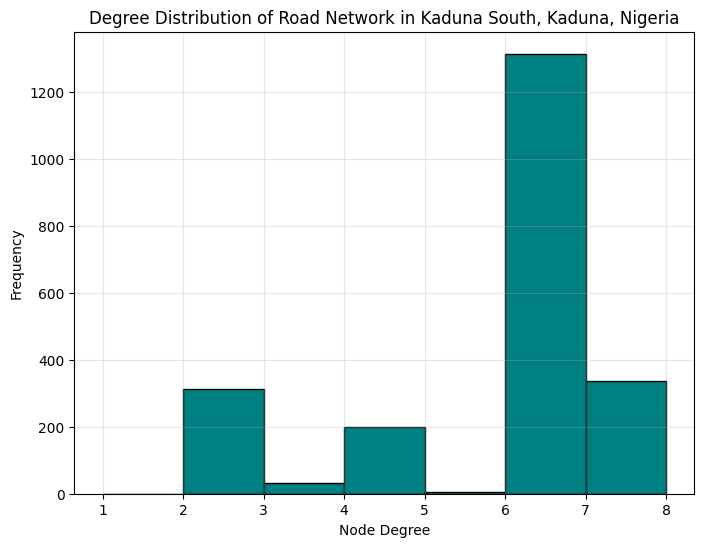

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(degrees, bins=range(1, max(degrees)+1), color='teal', edgecolor='black')
plt.title(f"Degree Distribution of Road Network in {place_name}")
plt.xlabel("Node Degree")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()

##Degree Distribution Statistics

In [ ]:
# Degree distribution statistics
import pandas as pd
degree_freq = nx.degree_histogram(G)
degree_df = pd.DataFrame({'Degree': range(len(degree_freq)), 'Frequency': degree_freq})
display(degree_df.head(10))


,Degree,Frequency
0,0,0
1,1,0
2,2,312
3,3,32
4,4,199
5,5,6
6,6,1314
7,7,0
8,8,336


In [ ]:
import numpy as np

print("\nDegree Statistics")
print(f"Number of nodes: {len(G.nodes)}")
print(f"Average degree: {np.mean(degrees):.2f}")
print(f"Maximum degree: {np.max(degrees)}")
print(f"Number of isolated nodes (degree 0): {sum(np.array(degrees) == 0)}")


Degree Statistics
Number of nodes: 2199
Average degree: 5.51
Maximum degree: 8
Number of isolated nodes (degree 0): 0


### Visualizing the graph

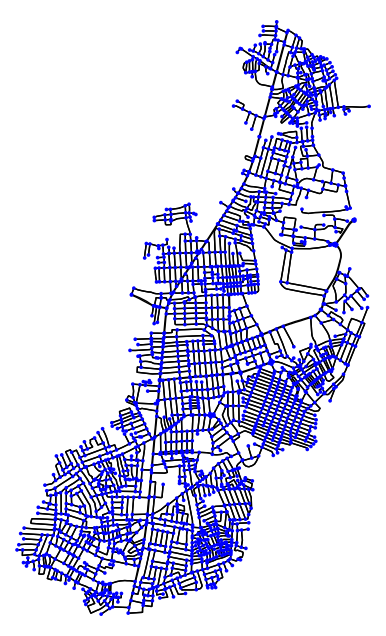

In [ ]:
fig, ax = ox.plot_graph(G, node_size=8, node_color='blue', edge_color='black', bgcolor='white')